In [1]:
import sys
sys.path.append('../src')
sys.path.append('../utils')
sys.path.append('../visualization')

import pandas as pd
import os
import pickle
from dimensionality_reduction import apply_all_dimensionality_reduction
from classification import apply_classifiers_original_features, apply_classifiers_reduced_data
from utils import get_weights, get_corr_table
from visualization import plot_correlation_matrix


# Read processed data
X_train = pickle.load(open(os.path.dirname(os.getcwd()) + '/data/processed_data/census_income/X_train.pkl', 'rb'))
X_test = pickle.load(open(os.path.dirname(os.getcwd()) + '/data/processed_data/census_income/X_test.pkl', 'rb'))
y_train = pickle.load(open(os.path.dirname(os.getcwd()) + '/data/processed_data/census_income/y_train.pkl', 'rb'))
y_test = pickle.load(open(os.path.dirname(os.getcwd()) + '/data/processed_data/census_income/y_test.pkl', 'rb'))

In [2]:
apply_classifiers_original_features(X_train, y_train, X_test, y_test)

0.6833333333333333

In [10]:
apply_all_dimensionality_reduction(X_train, X_test, y_train)

('10Dim', 'LLE', 'k=20-reg=0.001'): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]      

Saved reduced data at path: /Users/espina/Unsynced/Whitepaper/data/reduced_data/census_income/data.pkl


In [2]:
reduced_X = pickle.load(open(os.path.dirname(os.getcwd()) + '/data/reduced_data/census_income/data.pkl', 'rb'))
scores, reduced_X_best = apply_classifiers_reduced_data(reduced_X, y_train, y_test)

XGBoost: 100%|██████████| 28/28 [00:32<00:00,  1.15s/it]


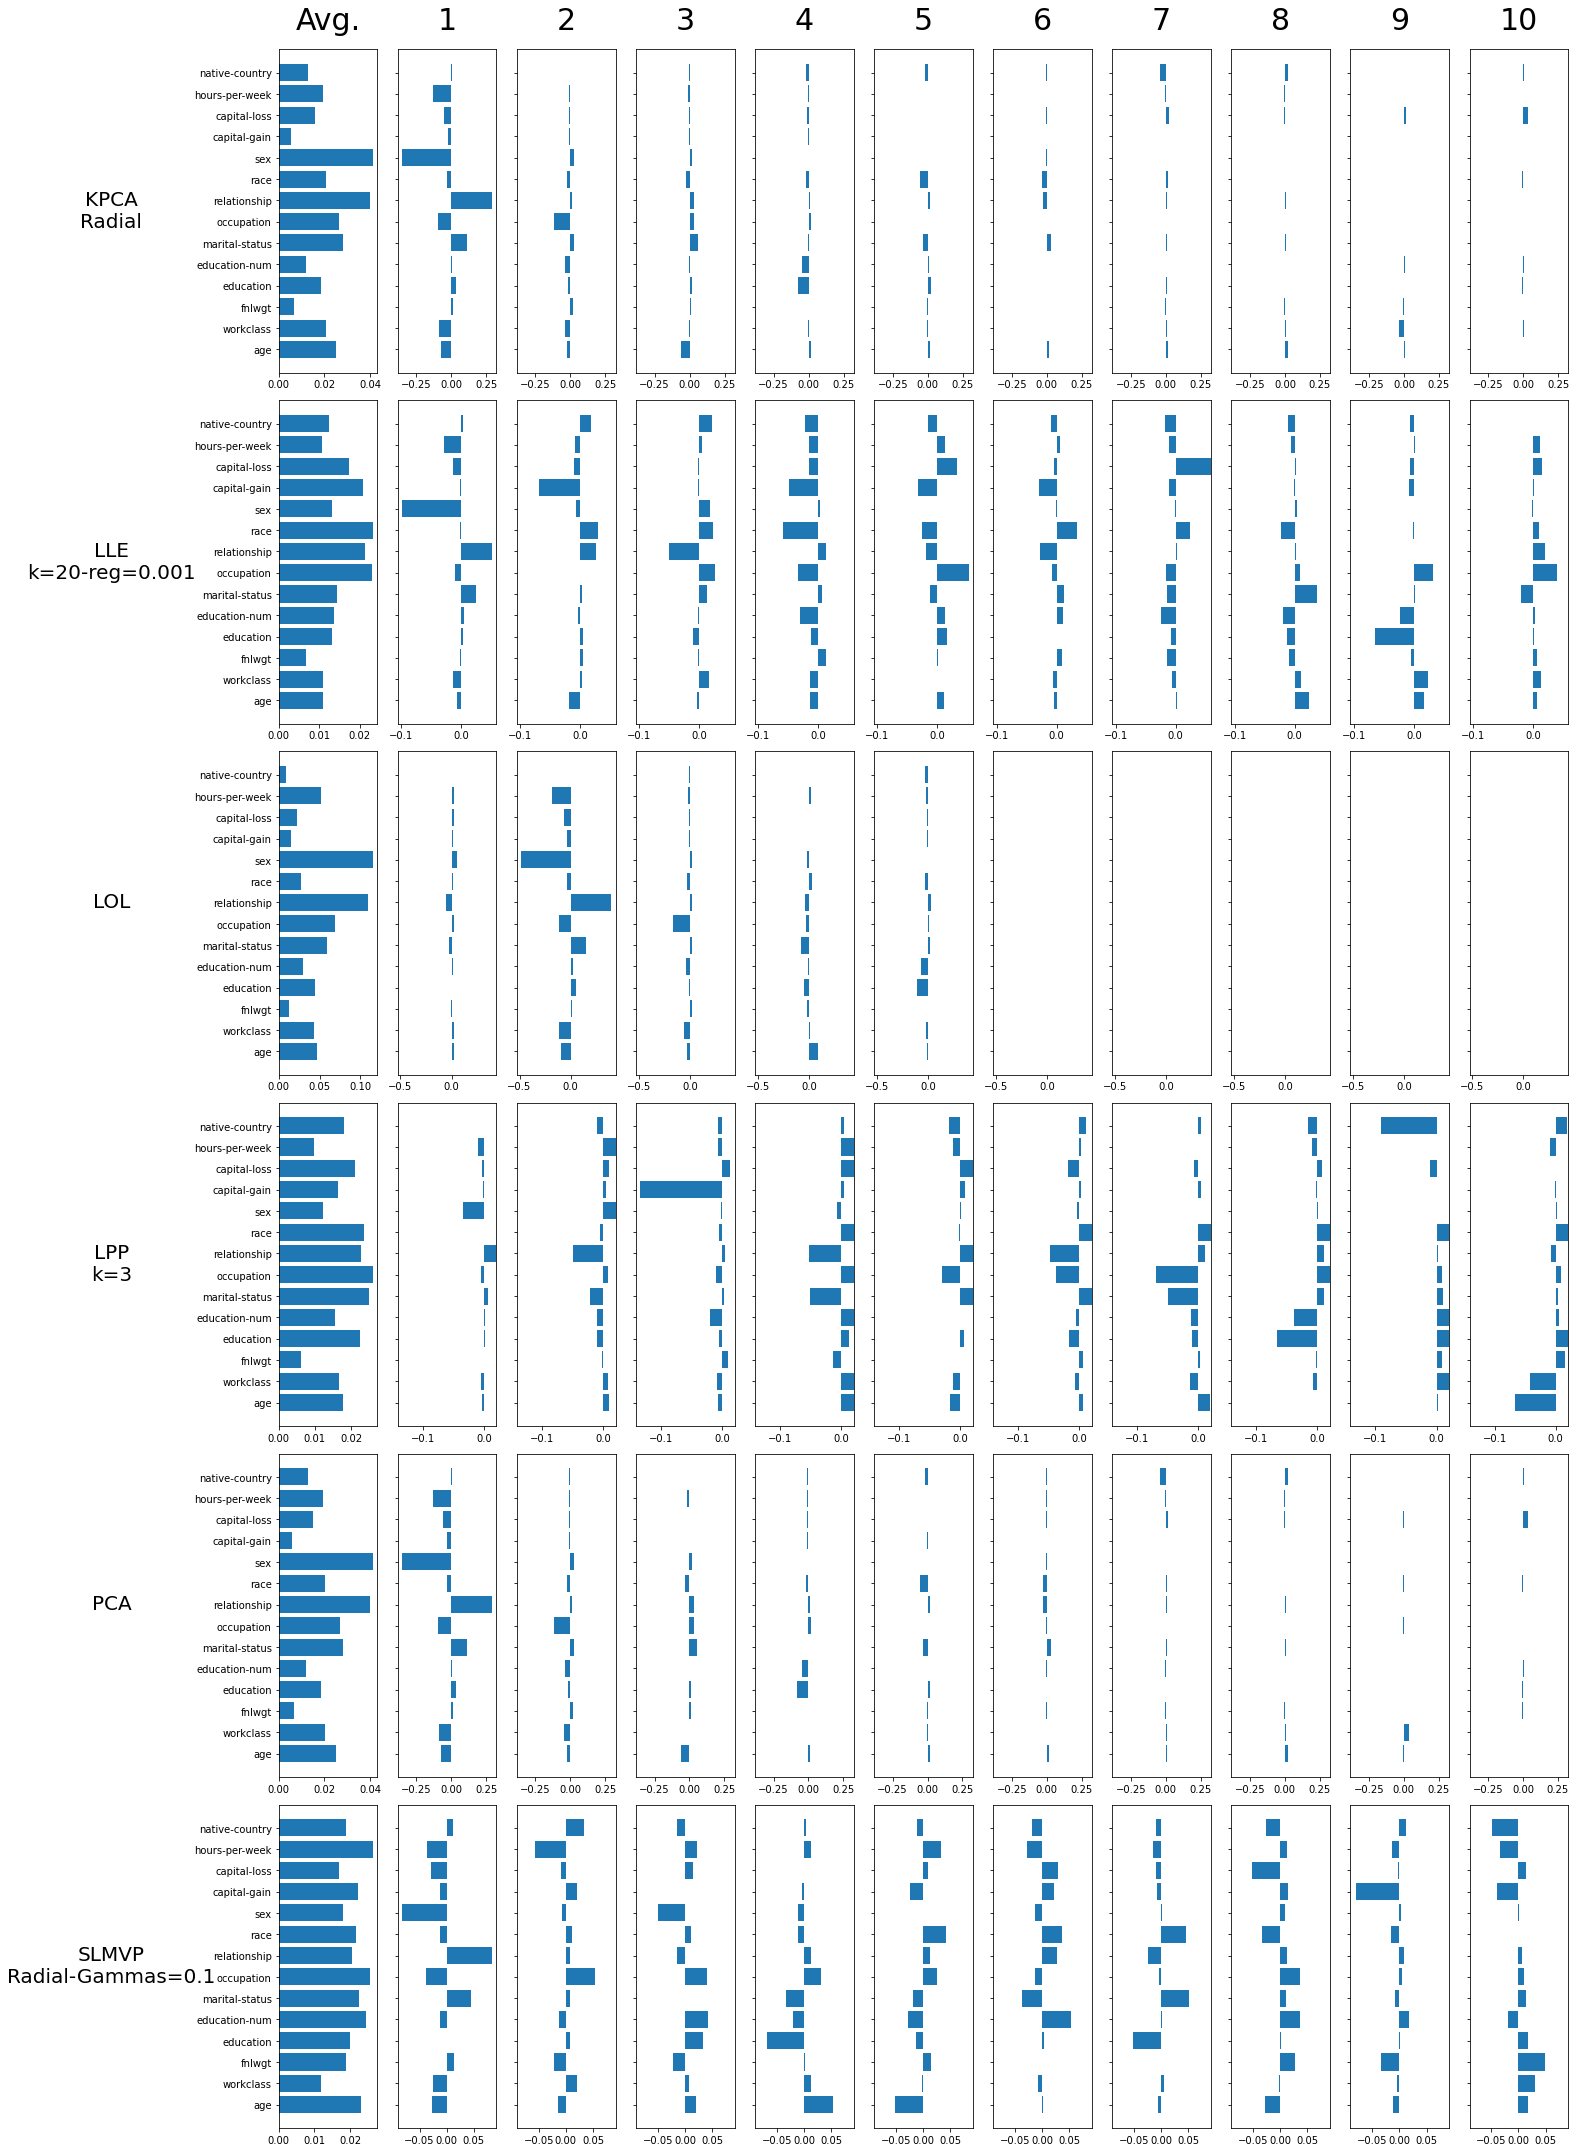

In [9]:
weights = get_weights(reduced_X_best, n_components=10)
# Read column names
with open(os.path.dirname(os.getcwd()) + '/data/processed_data/census_income/column_names.txt', 'r') as file:
    col_names = [line.strip() for line in file]
df_corrs, df_corrs_avg = get_corr_table(reduced_X_best, X_train, col_names, abs=False, weighted=True, weights=weights)
plot_correlation_matrix(df_corrs, df_corrs_avg, 10, figsize=(22,30))